In [27]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def capture_frame():
    js = Javascript('''
    async function takePhoto() {
      const div = document.createElement('div');
      const video = document.createElement('video');
      div.appendChild(video);
      document.body.appendChild(div);
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      div.remove();
      return canvas.toDataURL('image/jpeg', 1.0);
    }
    ''')
    display(js)
    data = eval_js('takePhoto()')
    binary = b64decode(data.split(',')[1])
    nparr = np.frombuffer(binary, np.uint8)
    frame = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return frame


<IPython.core.display.Javascript object>

Image saved as captured_image.jpg


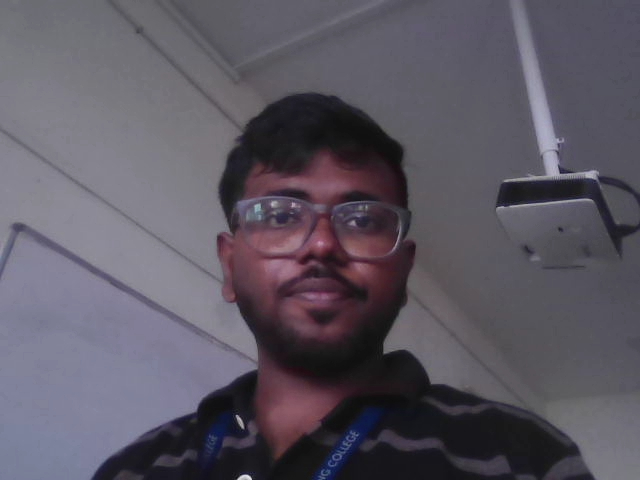

In [29]:
frame = capture_frame()
cv2.imwrite("captured_image.jpg", frame)
print("Image saved as captured_image.jpg")
cv2_imshow(frame)


<IPython.core.display.Javascript object>

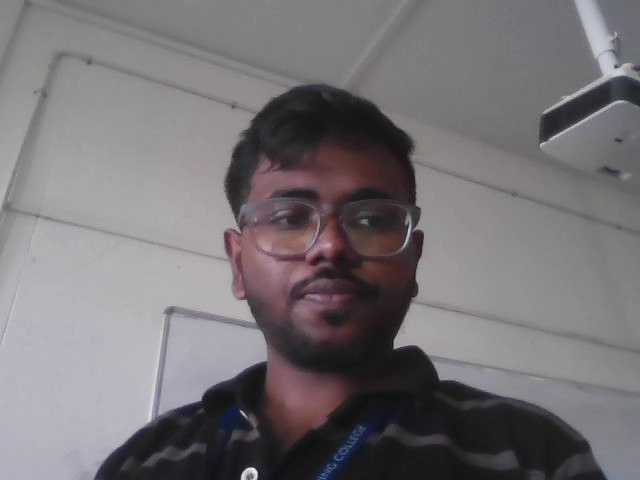

In [30]:
frame = capture_frame()
cv2_imshow(frame)


<IPython.core.display.Javascript object>

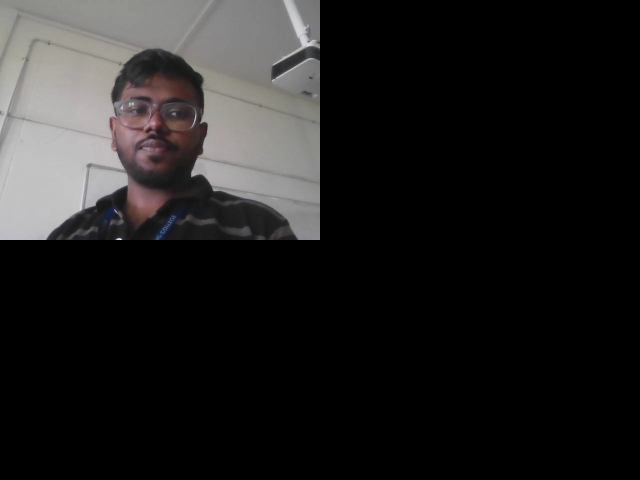

In [31]:
frame = capture_frame()
height, width, _ = frame.shape
smaller_frame = cv2.resize(frame, (0,0), fx=0.5, fy=0.5)
image = np.zeros_like(frame)
image[:height//2, :width//2] = smaller_frame
cv2_imshow(image)


<IPython.core.display.Javascript object>

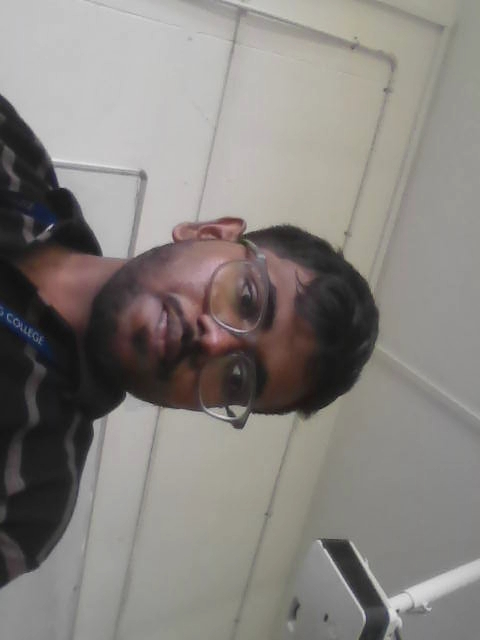

In [32]:
frame = capture_frame()
rotated = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
cv2_imshow(rotated)
